In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

Data Generation

In [2]:
observations = 1000

x = np.random.uniform(-10,10,(observations,1))
z = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((x,z))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 4*x - 2*z + 7 + noise

np.savez('TF_introduction', inputs = generated_inputs, targets = generated_targets)

Solving with TensorFlow

In [3]:
input_size = 2
output_size = 1

Outlining the model

In [4]:
# inputs = tf.placeholder(tf.float32,[None, input_size])
# targets = tf.placeholder(tf.float32,[None, output_size])

# weights = tf.Variable(tf.random_uniform([input_size, output_size], minval = -0.1, maxval = 0.1))
# biases = tf.Variable(tf.random_uniform([output_size], minval = -0.1, maxval = 0.1))

# outputs = tf.matmul(inputs,weights) + biases

inputs = tf.compat.v1.placeholder(tf.float32, [None, input_size])
targets = tf.compat.v1.placeholder(tf.float32, [None, output_size])

weights = tf.Variable(tf.random.uniform([input_size, output_size], minval=-0.1, maxval=0.1))
biases = tf.Variable(tf.random.uniform([output_size], minval=-0.1, maxval=0.1))

outputs = tf.matmul(inputs, weights) + biases

Choosing the objective function and the optimization method

In [5]:
mean_loss = tf.compat.v1.losses.mean_squared_error(labels=targets,predictions=outputs) / 2.

optimize = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = 0.05).minimize(mean_loss)

In [6]:
sess = tf.compat.v1.InteractiveSession()

Initializing variables

In [7]:
initializer = tf.compat.v1.global_variables_initializer()
sess.run(initializer)

Loading training data


In [8]:
training_data = np.load('TF_introduction.npz')

Learning

In [9]:
for e in range(100):
    _, curr_loss = sess.run([optimize, mean_loss],
                           feed_dict = {inputs:training_data['inputs'],targets: training_data['targets']})

    print(curr_loss)

353.90625
162.36188
79.808945
43.586235
27.18007
19.32386
15.209312
12.773496
11.125096
9.874672
8.848745
7.967279
7.1910286
6.498838
5.8777723
5.318847
4.8151016
4.360768
3.9508595
3.5809686
3.2471638
2.9459133
2.674034
2.428664
2.2072136
2.0073543
1.8269786
1.6641876
1.5172662
1.3846691
1.2649978
1.1569933
1.059518
0.97154605
0.8921498
0.8204935
0.7558229
0.69745713
0.6447808
0.5972403
0.5543343
0.5156108
0.48066345
0.44912246
0.4206563
0.3949653
0.37177876
0.35085255
0.3319667
0.31492192
0.299539
0.28565517
0.27312523
0.26181695
0.25161082
0.2424
0.23408677
0.22658403
0.21981296
0.21370204
0.20818654
0.20320904
0.19871655
0.19466205
0.19100282
0.1877004
0.18471986
0.18202993
0.1796022
0.17741114
0.17543362
0.17364901
0.17203838
0.17058471
0.16927268
0.16808872
0.1670201
0.16605571
0.16518527
0.1643997
0.16369073
0.16305089
0.16247346
0.16195221
0.1614819
0.16105734
0.16067417
0.16032843
0.16001634
0.15973471
0.15948047
0.15925112
0.15904407
0.15885718
0.1586886
0.15853637
0.15839902

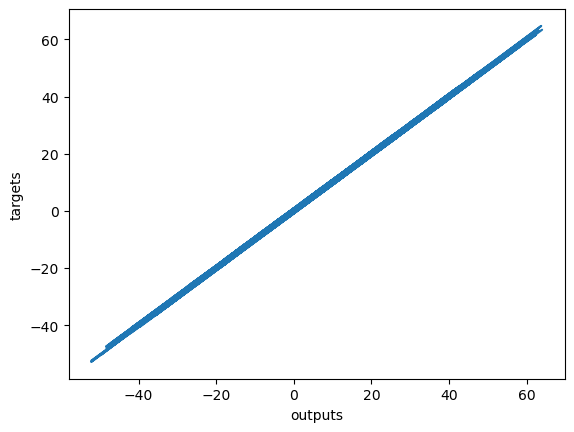

In [10]:
out = sess.run([outputs],
              feed_dict={inputs: training_data['inputs']})
plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()